In [1]:
import os
import fnmatch
import numpy as np
import matplotlib.pyplot as plt # after importting matplotlib, mayavi can not set api to 2: first run mayavi!!!!
import scipy as sp
import scipy.ndimage 
%matplotlib ipympl
#import matplotlib as mpl
#mpl.style.use('classic')
from latexify import latexify
latexify()

# Plot E-Q cut Osiris data exported from Matlab

## Define smooth function taking care of "nan"

In [2]:
from scipy import ndimage
def myGfilter(U, sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0,nanout=1): 
    #Gaussian filter with igonoring 'nan'
    #https://stackoverflow.com/questions/18697532/gaussian-filtering-a-image-with-nan-in-python
    
    nans = U!=U # positions of nan: nan is not equal to nan
    V=U.copy()
    V[nans]=0 # replace 'nan' by 'zero'
    VV=ndimage.gaussian_filter(V, sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)

    W=0*U.copy()+1 
    W[nans]=0 # label 'nan' and values with '0' and '1' respectively
    WW=ndimage.gaussian_filter(W, sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
    
    output = VV/WW
    if nanout:
        output[nans] = np.nan
    return output

# Constant energy cut of (HHL) plane

In [3]:
# find the files
fpath= r'D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/'
fname = '30mK-20K*[[HHL]]@E*[!_moon].txt'
#fname = '450mK-20K*[[HHL\]]@E*.txt'

ii=0 #index for different files
fnames = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        print(file)
        fnames.append(os.path.join(fpath,file))
print(fnames[0])

30mK-20K_[HHL]@E[-0.02,0.02].txt
30mK-20K_[HHL]@E[0.02,0.04].txt
30mK-20K_[HHL]@E[0.04,0.06].txt
30mK-20K_[HHL]@E[0.06,0.08].txt
30mK-20K_[HHL]@E[0.08,0.10].txt
30mK-20K_[HHL]@E[0.10,0.12].txt
30mK-20K_[HHL]@E[0.12,0.14].txt
30mK-20K_[HHL]@E[0.14,0.16].txt
30mK-20K_[HHL]@E[0.16,0.18].txt
30mK-20K_[HHL]@E[0.18,0.20].txt
30mK-20K_[HHL]@E[0.20,0.22].txt
30mK-20K_[HHL]@E[0.22,0.24].txt
30mK-20K_[HHL]@E[0.24,0.26].txt
30mK-20K_[HHL]@E[0.26,0.28].txt
30mK-20K_[HHL]@E[0.28,0.30].txt
30mK-20K_[HHL]@E[0.30,0.32].txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/30mK-20K_[HHL]@E[-0.02,0.02].txt


D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/30mK-20K_[HHL]@E[-0.02,0.02].txt


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


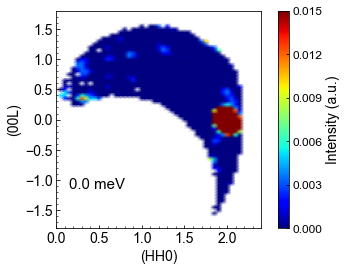

D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/30mK-20K_[HHL]@E[0.02,0.04].txt


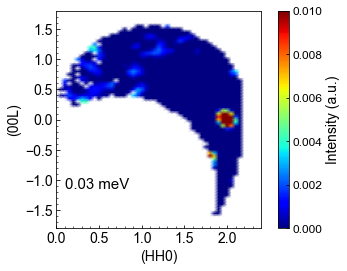

D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/30mK-20K_[HHL]@E[0.04,0.06].txt


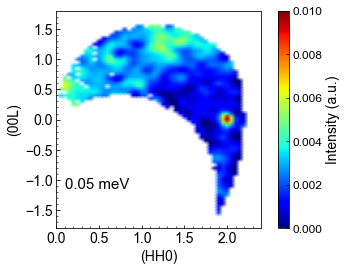

D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/30mK-20K_[HHL]@E[0.06,0.08].txt


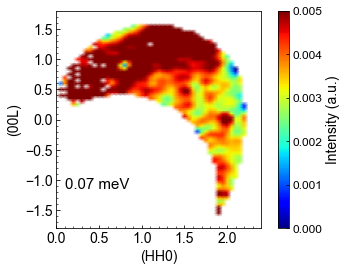

D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/30mK-20K_[HHL]@E[0.08,0.10].txt


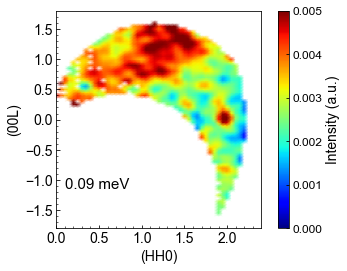

D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/30mK-20K_[HHL]@E[0.10,0.12].txt


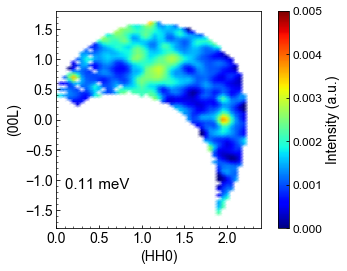

D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/30mK-20K_[HHL]@E[0.12,0.14].txt


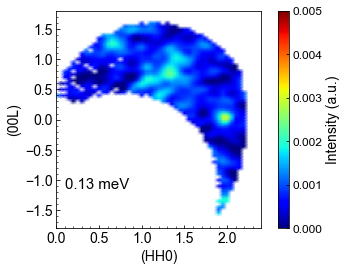

D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/30mK-20K_[HHL]@E[0.14,0.16].txt


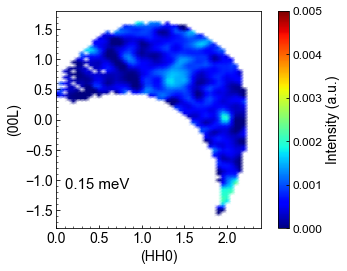

D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/30mK-20K_[HHL]@E[0.16,0.18].txt


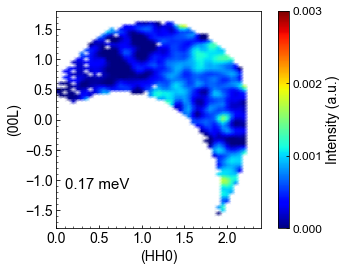

D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/30mK-20K_[HHL]@E[0.18,0.20].txt


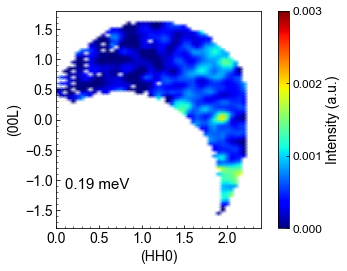

In [4]:
# Ｐｌｏｔ　ｉｎ　ａ　ｌｏｏｐ

# Colorbar limits and steps
#30mK-20K
cb_min =  [0,     0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000]
cb_max =  [0.015, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
cb_st   = [0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
e_label = [0.00, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.30]
nb_of_files = 16
#450mK-20K
cb_min =  [0,     0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000]
cb_max =  [0.015, 0.010, 0.010, 0.005, 0.005, 0.005, 0.005, 0.005, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003]
cb_st   = [0.003, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
e_label = [0.00, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.30]
nb_of_files = 10

for i in np.arange(0,nb_of_files,1):
    print(fnames[i])
    data = np.genfromtxt(fnames[i]) # data is nE by nQ*nQ
    x, y, z = data[:,0],data[:,1],data[:,2]

    # Get the data shape and reshape for plot
    nx = np.int(np.round((x.max()-x.min())/(x[1]-x[0])+1)) # nb of x and y values
    ny = np.int(len(x)/nx)
    X = np.reshape(x,[ny,nx])
    Y = np.reshape(y,[ny,nx])
    Z = z.reshape([ny,nx])
    Z = myGfilter(Z, sigma=[1,1], mode='constant')
    # Mask Nan
    z_min, z_max = np.nanmin(Z), np.nanmax(Z)
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color

    # Plot
    fig = plt.figure(figsize=(6,4))
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    pcol = plt.pcolormesh(X,Y, Zm, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot

    # set the limits of the plot to the limits of the data
    plt.gca().set_aspect(1/1.414)
    plt.axis([0, 2.4, -1.8, 1.8])
    plt.text(0.2, 0.2,str(e_label[i])+' meV',size=15, ha='center', va='center',transform=plt.gca().transAxes,
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    plt.xlabel('(HH0)',size=14)
    plt.ylabel('(00L)',size=14)

    plt.minorticks_on()
    plt.xticks(color='k', size=14)
    plt.yticks(color='k', size=14)

    # set colorbar and its properties
    cb = plt.colorbar(aspect=20,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
    cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)
    cb.ax.tick_params(labelsize=12)
    cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
    cb.ax.set_yticklabels(['{:.3f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])], fontsize=12)#, weight='bold')

    #fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",verbose=True)  

    plt.show()

In [33]:
# Plot pinch point and dispersion pinch point
# find the files
fpath= r'D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/'
fname = '30mK-20K*[[HHL]]@E*[_moon].txt'

ii=0 #index for different files
fnames = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        print(file)
        fnames.append(os.path.join(fpath,file))
print(fnames[0])

30mK-20K_[HHL]@E[0.06,0.09]_moon.txt
30mK-20K_[HHL]@E[0.09,0.30]_moon.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/30mK-20K_[HHL]@E[0.06,0.09]_moon.txt


<IPython.core.display.Javascript object>


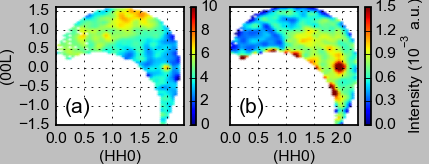

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [47]:
# Ｐｌｏｔ　ｉｎ　ａ　ｌｏｏｐ in subplots
# Colorbar limits and steps
#30mK
cb_max = [0.01,  0.0015]
cb_st =  [0.002, 0.0003]
label = '30 mK'

# latexify(fig_height=1.4,columns=1)
# fig, axs = plt.subplots(nrows=1,ncols=2)
# texts = ['(a)\n[0.6,0.9]meV', '(b)\n[0.9,3.0]meV']
# texts_pos = np.array([[0.07,0.06],[0.07,0.06]])

latexify(fig_height=1.3,columns=1)
fig, axs = plt.subplots(nrows=1,ncols=2)
texts = ['(a) [0.06,0.09] meV', '(b) [0.09,0.3] meV']
texts = ['(a)', '(b)']
texts_pos = np.array([[0.07,0.1],[0.07,0.1]])

for idx, fn in enumerate(fnames):
    data = np.genfromtxt(fn) # data is nE by nQ*nQ
    x, y, z = data[:,0],data[:,1],data[:,2]
    # Get the data shape and reshape for plot
    nx = np.int(np.rint((x.max()-x.min())/np.abs(x[1]-x[0])+1)) # nb of x and y values
    ny = np.int(len(x)/nx)
    X = np.reshape(x,[ny,nx])
    Y = np.reshape(y,[ny,nx])
    Z = z.reshape([ny,nx])
    
    Z = myGfilter(Z, sigma=[1,1], mode='constant')
    
    # Mask Nan
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
    
    # Plot
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    pcol = axs[idx].pcolormesh(X,Y, Zm*1000, vmin=0, vmax=cb_max[idx]*1000, cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot

    # set the limits of the plot to the limits of the data
    axs[idx].set_xlim([0,2.3])
    axs[idx].set_ylim([-1.5, 1.6])
    
    axs[idx].set_xlabel('(HH0)',labelpad=2)
    if idx==0:
        axs[idx].set_ylabel('(00L)',labelpad=2)  
    else:
        axs[idx].get_yaxis().set_ticklabels([])
        
    axs[idx].tick_params(axis='both', length=0)    
    # set colorbar and its properties
    cb = fig.colorbar(pcol, ax=axs[idx],aspect=20,pad=0.04) 
    ticks = 1000*np.arange(0, cb_max[idx]+cb_st[idx],cb_st[idx])
    cb.set_ticks(ticks)
    if idx==0:
        cb.ax.set_yticklabels(['{:.0f}'.format(x) for x in ticks])
    else:
        cb.ax.set_yticklabels(['{:.1f}'.format(x) for x in ticks])
                           
    cb.ax.yaxis.set_tick_params(pad=2)
    if idx==1:
        cb.ax.set_ylabel('Intensity ($10^{-3}$ a.u.)',labelpad=2)
        
    #axs[idx].text(texts_pos[idx,0], texts_pos[idx,1], texts[idx], transform=axs[idx].transAxes,
    #              fontsize=10,backgroundcolor='none',zorder=10) 
    axs[idx].text(texts_pos[idx,0], texts_pos[idx,1], texts[idx], transform=axs[idx].transAxes,
                  fontsize=12,backgroundcolor='white',zorder=10,
                  bbox=dict(boxstyle='square,pad=0',fc='white',ec='none'))
    
    axs[idx].grid(lw=0.5)
    plt.show()

plt.tight_layout(pad=0.,w_pad=0, h_pad=0)
fig.savefig(fnames[0].replace(".txt", "_all.pdf"),bbox_inches="tight",pad_inches=0)  

# Cut E-Q along (HH1.5)

## 30mK 0.5T data

In [5]:
# find the files
fpath= r'D:\5_Neutron Scattering\9_Orisis_NdZrO\0_Nd2Zr2O7_in_110_field\cuts/'
fname = '*_E-Q_sum-L*.txt'
ii=0 #index for different files
fnames = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        print(file)
        fnames.append(os.path.join(fpath,file))
print(fnames[0])

20K-0T_E-Q_sum-L[1,3].txt
20K-0T_E-Q_sum-L[1.2,1.8].txt
20K-0T_E-Q_sum-L[2.2,2.8].txt
20K-0T_E-Q_sum-L[2.2,3].txt
30mK-0.5T_E-Q_sum-L[1,3].txt
30mK-0.5T_E-Q_sum-L[1.2,1.8].txt
30mK-0.5T_E-Q_sum-L[2.2,2.8].txt
30mK-0.5T_E-Q_sum-L[2.2,3].txt
30mK-1T_E-Q_sum-L[1,3].txt
30mK-1T_E-Q_sum-L[1.2,1.8].txt
30mK-1T_E-Q_sum-L[2.2,2.8].txt
30mK-1T_E-Q_sum-L[2.2,3].txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\0_Nd2Zr2O7_in_110_field\cuts/20K-0T_E-Q_sum-L[1,3].txt


D:\5_Neutron Scattering\9_Orisis_NdZrO\0_Nd2Zr2O7_in_110_field\cuts/30mK-0.5T_E-Q_sum-L[1,3].txt


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\filters.py:1430: RuntimeWarning: Mean of empty slice
  cval, origins, extra_arguments, extra_keywords)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


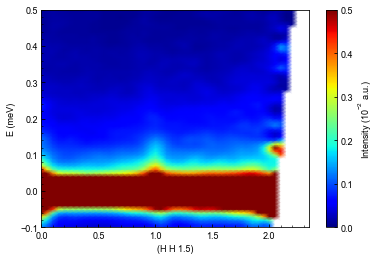

D:\5_Neutron Scattering\9_Orisis_NdZrO\0_Nd2Zr2O7_in_110_field\cuts/30mK-0.5T_E-Q_sum-L[1.2,1.8].txt


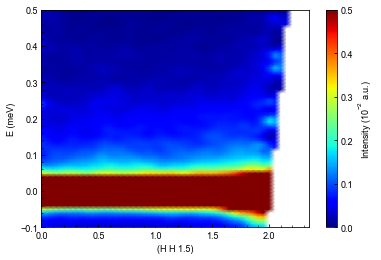

D:\5_Neutron Scattering\9_Orisis_NdZrO\0_Nd2Zr2O7_in_110_field\cuts/30mK-0.5T_E-Q_sum-L[2.2,2.8].txt


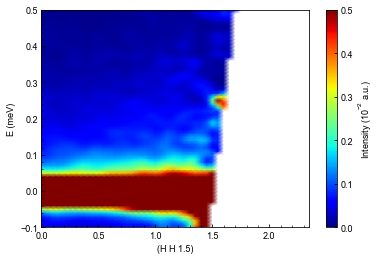

D:\5_Neutron Scattering\9_Orisis_NdZrO\0_Nd2Zr2O7_in_110_field\cuts/30mK-0.5T_E-Q_sum-L[2.2,3].txt


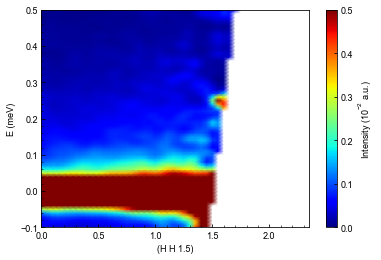

In [6]:
# Ｐｌｏｔ　ｉｎ　ａ　ｌｏｏｐ
# Colorbar limits and steps
#30mK
cb_max = [0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
cb_st =  [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
label = '30 mK'

for i in range(4,8):
    print(fnames[i])
    data = np.genfromtxt(fnames[i]) # data is nE by nQ*nQ
    x, y, z = data[:,0],data[:,1],data[:,2]
    # Get the data shape and reshape for plot
    nx = np.int(np.rint((x.max()-x.min())/np.abs(x[1]-x[0])+1)) # nb of x and y values
    ny = np.int(len(x)/nx)
    X = np.reshape(x,[ny,nx])
    Y = np.reshape(y,[ny,nx])
    Z = z.reshape([ny,nx])
    
    Z = myGfilter(Z, sigma=[1,1], mode='constant')
    
    # Mask Nan or replace nan with neibor average
    #z_min, z_max = np.nanmin(Z), np.nanmax(Z)
    #Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
    
    Z = np.where(np.isnan(Z), ndimage.generic_filter(Z, np.nanmean, size=3) ,Z)
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
    
    # Plot
    fig = plt.figure()
    # pcolormesh actually draws individual rectangles which contains white lines
    #cmap = plt.cm.RdBu_r
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    pcol = plt.pcolormesh(X,Y, Zm*100, vmin=0, vmax=cb_max[i]*100, cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot

#     plt.text(0.15, 0.9, label, size=15,color='red', ha='center', va='center',transform=plt.gca().transAxes,
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    # set the limits of the plot to the limits of the data
    #plt.xlim([-2,1.5])
    plt.ylim([-0.1, 0.5])
    plt.xlabel('(H H 1.5)')
    plt.ylabel(r'E (meV)')

    plt.minorticks_on()
    plt.xticks(color='k')
    plt.yticks(color='k')

    # set colorbar and its properties
    cb = plt.colorbar(aspect=20,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
    cb.ax.set_ylabel('Intensity ($10^{-2}$ a.u.)')

    #cb.ax.tick_params(labelsize=12)
    #cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
    #cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])], fontsize=12)#, weight='bold')

    #fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",verbose=True)  
    plt.show()

D:\5_Neutron Scattering\9_Orisis_NdZrO\0_Nd2Zr2O7_in_110_field\cuts/30mK-0.5T_E-Q_sum-L[1,3].txt
-0.014499604217023294


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


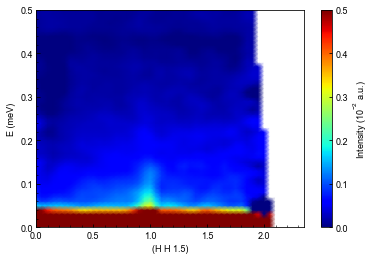

D:\5_Neutron Scattering\9_Orisis_NdZrO\0_Nd2Zr2O7_in_110_field\cuts/30mK-0.5T_E-Q_sum-L[1.2,1.8].txt
-0.0006640984901460452


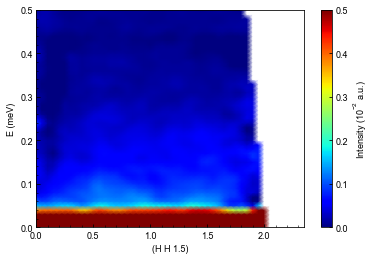

D:\5_Neutron Scattering\9_Orisis_NdZrO\0_Nd2Zr2O7_in_110_field\cuts/30mK-0.5T_E-Q_sum-L[2.2,2.8].txt
-0.004949284453156625


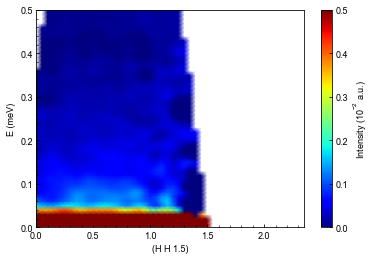

D:\5_Neutron Scattering\9_Orisis_NdZrO\0_Nd2Zr2O7_in_110_field\cuts/30mK-0.5T_E-Q_sum-L[2.2,3].txt
-0.004949284453156625


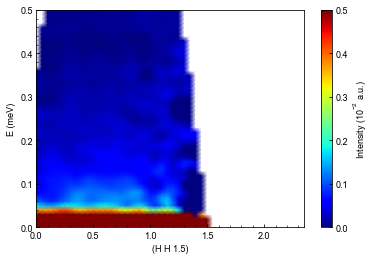

In [7]:
# Subtract negative part
# Ｐｌｏｔ　ｉｎ　ａ　ｌｏｏｐ
from matplotlib.colors import LogNorm

for i in range(4,8):
    print(fnames[i])
    data = np.genfromtxt(fnames[i]) # data is nE by nQ*nQ
    x, y, z = data[:,0],data[:,1],data[:,2]
    # Get the data shape and reshape for plot
    nx = np.int(np.rint((x.max()-x.min())/np.abs(x[1]-x[0])+1)) # nb of x and y values
    ny = np.int(len(x)/nx)
    X = np.reshape(x,[ny,nx])
    Y = np.reshape(y,[ny,nx])
    Z = z.reshape([ny,nx])
    #break
    ny = (ny+1)//3
    X = X[ny:ny*2,:]
    Y = Y[ny:ny*2,:]
    Z = Z[ny:ny*2,:] - 1*Z[ny-1::-1,:]
    Z = myGfilter(Z, sigma=[1,1], mode='constant')
    
    print(np.nanmin(Z))
    # Mask Nan or replace nan with neibor average
    #z_min, z_max = np.nanmin(Z), np.nanmax(Z)
    #Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
    
    Zm = np.where(np.isnan(Z), ndimage.generic_filter(Z, np.nanmean, size=3) ,Z)# replace by mean of neigbours
    #Zm = np.where(np.less_equal(Z,0)|np.isnan(Z), 0.000001, Z)
    #Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
    
    # Plot
    fig = plt.figure()
    # pcolormesh actually draws individual rectangles which contains white lines
    #cmap = plt.cm.RdBu_r
    cmap = plt.cm.jet
    #cmap.set_bad('w',0.)
    pcol = plt.pcolormesh(X,Y, Zm*100, vmin=0, vmax=cb_max[i]*100, cmap=cmap, linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    #pcol = plt.pcolormesh(X,Y, Zm*100, cmap=cmap, norm = LogNorm(vmin=0.000001, vmax=cb_max[i]*100*1000), linewidth=0, rasterized=True,shading='gouraud')# '_r' is reversed colormap
    # vmin should not be 0 for lognorm
    pcol.set_edgecolor('face') # remove the white lines in the plot

#     plt.text(0.15, 0.9, label, size=15,color='red', ha='center', va='center',transform=plt.gca().transAxes,
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    # set the limits of the plot to the limits of the data
    #plt.xlim([-2,1.5])
    #plt.ylim([-0.5, 0.5])
    plt.xlabel('(H H 1.5)')
    plt.ylabel(r'E (meV)')

    plt.minorticks_on()
    plt.xticks(color='k')
    plt.yticks(color='k')

    # set colorbar and its properties
    cb = plt.colorbar(aspect=20,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
    cb.ax.set_ylabel('Intensity ($10^{-2}$ a.u.)')

    #cb.ax.tick_params(labelsize=12)
    #cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
    #cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])], fontsize=12)#, weight='bold')

    #fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",verbose=True)  
    plt.show()

array([2, 1])

<IPython.core.display.Javascript object>


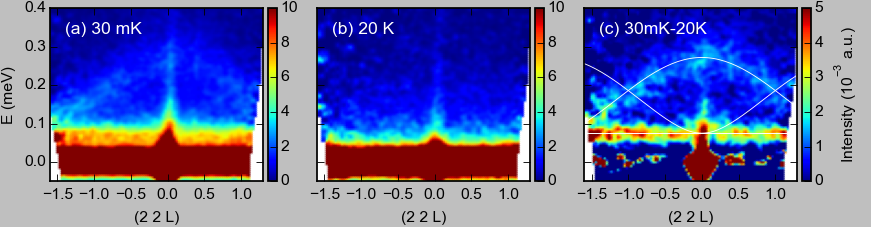

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\filters.py:1430: RuntimeWarning: Mean of empty slice
  cval, origins, extra_arguments, extra_keywords)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [31]:
# Ｐｌｏｔ　ｉｎ　ａ　ｌｏｏｐ in subplots
# Colorbar limits and steps
#30mK
cb_max = [0.01,  0.005, 0.01]
cb_st =  [0.002, 0.001, 0.002]
label = '30 mK'
#450mK
# cb_max = [0.05,  0.05,  0.05,  0.05,  0.1,  0.05, 0.05,  0.05]
# cb_st =  [0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01]
# label = '450 mK'

texts = ['(a) 30 mK', '(b) 20 K', '(c) 30mK-20K']
texts_pos = np.array([[0.07,0.85],[0.07,0.85],[0.07,0.85]])

latexify(fig_width=6.9, fig_height=1.8, columns=2)
fig, axs = plt.subplots(nrows=1,ncols=3)

for idx, i in enumerate([2,0,1]):
    data = np.genfromtxt(fnames[i]) # data is nE by nQ*nQ
    x, y, z = data[:,0],data[:,1],data[:,2]
    # Get the data shape and reshape for plot
    nx = np.int(np.rint((x.max()-x.min())/np.abs(x[1]-x[0])+1)) # nb of x and y values
    ny = np.int(len(x)/nx)
    X = np.reshape(x,[ny,nx])
    Y = np.reshape(y,[ny,nx])
    Z = z.reshape([ny,nx])
    
    Z = myGfilter(Z, sigma=[1,1], mode='constant')
    
    # Mask Nan or replace nan with neibor average
    #z_min, z_max = np.nanmin(Z), np.nanmax(Z)
    #Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
    
    Z = np.where(np.isnan(Z), ndimage.generic_filter(Z, np.nanmean, size=3) ,Z)
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
    
    # Plot
    # pcolormesh actually draws individual rectangles which contains white lines
    #cmap = plt.cm.RdBu_r
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    pcol = axs[idx].pcolormesh(X,Y, Zm*1000, vmin=0, vmax=cb_max[i]*1000, cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot

#     plt.text(0.15, 0.9, label, size=15,color='red', ha='center', va='center',transform=plt.gca().transAxes,
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    # set the limits of the plot to the limits of the data
    axs[idx].set_xlim([-1.6,1.3])
    axs[idx].set_ylim([-0.05, 0.4])
    
    ticks = np.arange(0,0.4+0.1,0.1)
    axs[idx].yaxis.set_ticks(ticks)
    axs[idx].set_yticklabels(['{:.1f}'.format(x) for x in ticks])
    axs[idx].yaxis.set_tick_params(pad=2)
    
    axs[idx].set_xlabel('(2 2 L)')
    if idx==0:
        axs[idx].set_ylabel('E (meV)')  
    else:
        axs[idx].get_yaxis().set_ticklabels([])
        
    # set colorbar and its properties
    cb = fig.colorbar(pcol, ax=axs[idx],aspect=20,pad=0.02) 
    ticks = 1000*np.arange(0, cb_max[i]+cb_st[i],cb_st[i])
    cb.set_ticks(ticks)
    cb.ax.set_yticklabels(['{:.0f}'.format(x) for x in ticks])
    cb.ax.yaxis.set_tick_params(pad=2)
    if idx==2:
        cb.ax.set_ylabel('Intensity ($10^{-3}$ a.u.)')
        
    axs[idx].text(texts_pos[idx,0], texts_pos[idx,1], texts[idx], color='white',transform=axs[idx].transAxes,fontsize=10)  
    #plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
    
    if idx==2:
        for jj in np.arange(0,4):
            axs[idx].plot(hkls_omega, np.abs(omega[jj,:]), 'w-', fillstyle='full',lw=0.5,mec='w',mfc='w',ms=0.1)
            #axs[idx].scatter(hkls_omega, omega[jj,:], s=0.005,c='white',linewidths=1)
    plt.show()
    
plt.tight_layout(pad=0.1,w_pad=0, h_pad=0)
fig.savefig(fnames[0].replace("txt", "_all.pdf"), bbox_inches="tight",verbose=True)  

In [300]:
fig.savefig(fnames[0].replace("txt", "_all.pdf"), bbox_inches="tight",verbose=True)  

<IPython.core.display.Javascript object>


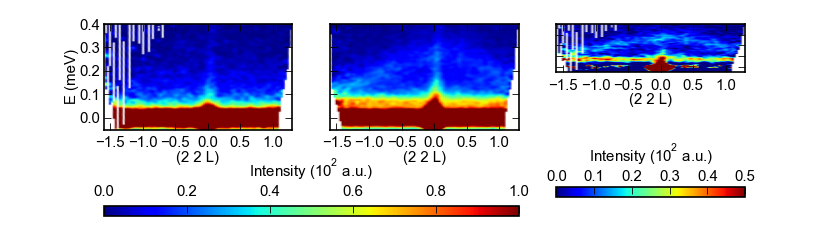

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: invalid value encountered in divide


In [74]:
# Ｐｌｏｔ　ｉｎ　ａ　ｌｏｏｐ  in subplots (horizontal colorbar)
# Colorbar limits and steps
#30mK
cb_max = [0.01,  0.005, 0.01]
cb_st =  [0.002, 0.001, 0.002]
label = '30 mK'
#450mK
# cb_max = [0.05,  0.05,  0.05,  0.05,  0.1,  0.05, 0.05,  0.05]
# cb_st =  [0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01]
# label = '450 mK'

latexify(fig_width=6.9, fig_height=2, columns=2)
fig, axs = plt.subplots(nrows=1,ncols=3)

nb_of_files = 2
for idx, i in enumerate([0,2,1]):
    data = np.genfromtxt(fnames[i]) # data is nE by nQ*nQ
    x, y, z = data[:,0],data[:,1],data[:,2]
    # Get the data shape and reshape for plot
    nx = np.int(np.rint((x.max()-x.min())/np.abs(x[1]-x[0])+1)) # nb of x and y values
    ny = np.int(len(x)/nx)
    X = np.reshape(x,[ny,nx])
    Y = np.reshape(y,[ny,nx])
    Z = z.reshape([ny,nx])
    
    Z = myGfilter(Z, sigma=[1,1], mode='constant')
    
    # Mask Nan or replace nan with neibor average
    z_min, z_max = np.nanmin(Z), np.nanmax(Z)
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
    
    #Z = np.where(np.isnan(Z), ndimage.generic_filter(Z, np.nanmean, size=3) ,Z)
    #Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
    
    # Plot
    # pcolormesh actually draws individual rectangles which contains white lines
    #cmap = plt.cm.RdBu_r
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    pcol = axs[idx].pcolormesh(X,Y, Zm*100, vmin=0, vmax=cb_max[i]*100, cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot

#     plt.text(0.15, 0.9, label, size=15,color='red', ha='center', va='center',transform=plt.gca().transAxes,
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    # set the limits of the plot to the limits of the data
    axs[idx].set_xlim([-1.6,1.3])
    axs[idx].set_ylim([-0.05, 0.4])
    
    ticks = np.arange(0,0.4+0.1,0.1)
    axs[idx].yaxis.set_ticks(ticks)
    axs[idx].set_yticklabels(['{:.1f}'.format(x) for x in ticks])
    axs[idx].yaxis.set_tick_params(pad=2)
    
    axs[idx].set_xlabel('(2 2 L)',labelpad=0.15)
    
    if idx==0:
        axs[idx].set_ylabel(r'E (meV)',labelpad=0.15)  
    else:
        axs[idx].get_yaxis().set_ticklabels([])
        
    #plt.minorticks_on()

    # set colorbar and its properties
    if i==2:
        cb = fig.colorbar(pcol, ax=axs[0:2].ravel().tolist(), orientation='horizontal',
                          anchor=(0,0), aspect=40, pad=0.3)
        cb.ax.xaxis.set_ticks_position('top')
        cb.ax.xaxis.set_label_position('top')
        #cbaxes = fig.add_axes([0.1, 0.9, 0.5, 0.1]) 
        #cb = plt.colorbar(pcol, cax = cbaxes,orientation='horizontal')  
        #cb.ax.tick_params(axis='x',direction='in',top='on',bottom='off',labeltop='on',labelbottom='off', pad=0.02)
        ticks = 100*np.arange(0, cb_max[i]+cb_st[i],cb_st[i])
        cb.set_ticks(ticks)
        cb.ax.set_yticklabels(['{:.1f}'.format(x) for x in ticks])
        cb.ax.yaxis.set_tick_params(pad=2)
        cb.ax.set_xlabel('Intensity ($10^2$ a.u.)',labelpad = 5)
    if i==1:
        cb = fig.colorbar(pcol, ax=axs[2], orientation='horizontal',  aspect=20, pad=0.6)
        cb.ax.xaxis.set_ticks_position('top')
        cb.ax.xaxis.set_label_position('top')
        ticks = 100*np.arange(0, cb_max[i]+cb_st[i],cb_st[i])
        cb.set_ticks(ticks)
        cb.ax.set_yticklabels(['{:.1f}'.format(x) for x in ticks])
        cb.ax.xaxis.set_tick_params(pad=2)
        cb.ax.set_xlabel('Intensity ($10^2$ a.u.)',labelpad = 5)
        #cb.ax.xlabelpad = -10
        
#     plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
#                         wspace=None, hspace=None)
    #fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",verbose=True)  
    #plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


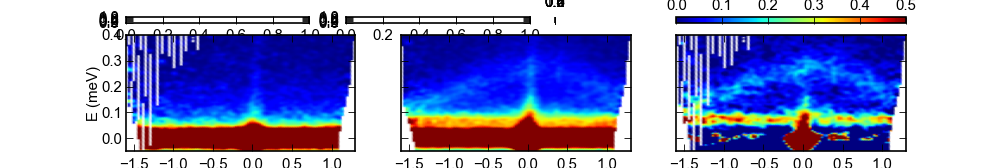

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: invalid value encountered in divide


In [95]:
# Ｐｌｏｔ　ｉｎ　ａ　ｌｏｏｐ  in subplots (horizontal colorbar)
# Colorbar limits and steps
#30mK
cb_max = [0.01,  0.005, 0.01]
cb_st =  [0.002, 0.001, 0.002]
label = '30 mK'
#450mK
# cb_max = [0.05,  0.05,  0.05,  0.05,  0.1,  0.05, 0.05,  0.05]
# cb_st =  [0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01]
# label = '450 mK'

latexify(fig_width=6.9, fig_height=2, columns=2)
fig, axs = plt.subplots(nrows=2,ncols=3, gridspec_kw={"height_ratios":[0.05,1]})

cax, kw = mpl.colorbar.make_axes([ax for ax in axs[0,0:2].flat])

nb_of_files = 2
for idx, i in enumerate([0,2,1]):
    data = np.genfromtxt(fnames[i]) # data is nE by nQ*nQ
    x, y, z = data[:,0],data[:,1],data[:,2]
    # Get the data shape and reshape for plot
    nx = np.int(np.rint((x.max()-x.min())/np.abs(x[1]-x[0])+1)) # nb of x and y values
    ny = np.int(len(x)/nx)
    X = np.reshape(x,[ny,nx])
    Y = np.reshape(y,[ny,nx])
    Z = z.reshape([ny,nx])
    
    Z = myGfilter(Z, sigma=[1,1], mode='constant')
    
    # Mask Nan or replace nan with neibor average
    z_min, z_max = np.nanmin(Z), np.nanmax(Z)
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
    
    #Z = np.where(np.isnan(Z), ndimage.generic_filter(Z, np.nanmean, size=3) ,Z)
    #Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color
    
    # Plot
    # pcolormesh actually draws individual rectangles which contains white lines
    #cmap = plt.cm.RdBu_r
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    pcol = axs[1,idx].pcolormesh(X,Y, Zm*100, vmin=0, vmax=cb_max[i]*100, cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot

#     plt.text(0.15, 0.9, label, size=15,color='red', ha='center', va='center',transform=plt.gca().transAxes,
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    # set the limits of the plot to the limits of the data
    axs[1,idx].set_xlim([-1.6,1.3])
    axs[1,idx].set_ylim([-0.05, 0.4])
    
    ticks = np.arange(0,0.4+0.1,0.1)
    axs[1,idx].yaxis.set_ticks(ticks)
    axs[1,idx].set_yticklabels(['{:.1f}'.format(x) for x in ticks])
    axs[1,idx].yaxis.set_tick_params(pad=2)
    
    axs[1,idx].set_xlabel('(2 2 L)',labelpad=0.15)
    
    if idx==0:
        axs[1,idx].set_ylabel(r'E (meV)',labelpad=0.15)  
    else:
        axs[1,idx].get_yaxis().set_ticklabels([])
        
    #plt.minorticks_on()

    # set colorbar and its properties
    if i==2:
        cb = fig.colorbar(pcol, cax=cax, orientation='horizontal')
        cb.ax.xaxis.set_ticks_position('top')
        cb.ax.xaxis.set_label_position('top')
        ticks = 100*np.arange(0, cb_max[i]+cb_st[i],cb_st[i])
        cb.set_ticks(ticks)
        cb.ax.set_yticklabels(['{:.1f}'.format(x) for x in ticks])
        cb.ax.yaxis.set_tick_params(pad=2)
        cb.ax.set_xlabel('Intensity ($10^2$ a.u.)',labelpad = 5)
    if i==1:
        cb = fig.colorbar(pcol, cax=axs[0,2], orientation='horizontal')
        cb.ax.xaxis.set_ticks_position('top')
        cb.ax.xaxis.set_label_position('top')
        ticks = 100*np.arange(0, cb_max[i]+cb_st[i],cb_st[i])
        cb.set_ticks(ticks)
        cb.ax.set_yticklabels(['{:.1f}'.format(x) for x in ticks])
        cb.ax.xaxis.set_tick_params(pad=2)
        cb.ax.set_xlabel('Intensity ($10^2$ a.u.)',labelpad = 5)
        
#     plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
#                         wspace=None, hspace=None)
    #fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",verbose=True)  
    #plt.tight_layout()
    plt.show()

## Subtract a smoothed background

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: invalid value encountered in divide


<IPython.core.display.Javascript object>


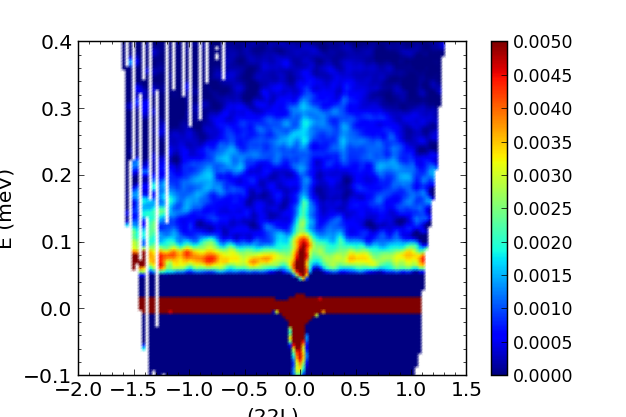

In [33]:
# Subtract a smoothed background

# 20K data
data = np.genfromtxt(fnames[0]) # data is nE by nQ*nQ
x, y, z = data[:,0],data[:,1],data[:,2]
# Get the data shape and reshape for plot
nx = np.int(np.rint((x.max()-x.min())/np.abs(x[1]-x[0])+1)) # nb of x and y values
ny = np.int(len(x)/nx)
X = np.reshape(x,[ny,nx])
Y = np.reshape(y,[ny,nx])
Z = z.reshape([ny,nx])
# Smooth the background
Z = myGfilter(Z, sigma=[2,2], mode='constant')

# 30mK data
data = np.genfromtxt(fnames[2]) # data is nE by nQ*nQ
x, y, z = data[:,0],data[:,1],data[:,2]
# Get the data shape and reshape for plot
nx = np.int(np.rint((x.max()-x.min())/np.abs(x[1]-x[0])+1)) # nb of x and y values
ny = np.int(len(x)/nx)
X = np.reshape(x,[ny,nx])
Y = np.reshape(y,[ny,nx])
# Subtraction
Z = z.reshape([ny,nx])- Z

Z = myGfilter(Z, sigma=[1,1], mode='constant')

# Mask Nan
z_min, z_max = np.nanmin(Z), np.nanmax(Z)
Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color

# Plot
fig = plt.figure(figsize=(6,4))
# pcolormesh actually draws individual rectangles which contains white lines
#cmap = plt.cm.RdBu_r
cmap = plt.cm.jet
cmap.set_bad('w',1.)
pcol = plt.pcolormesh(X,Y, Zm, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
pcol.set_edgecolor('face') # remove the white lines in the plot

#     plt.text(0.15, 0.9, label, size=15,color='red', ha='center', va='center',transform=plt.gca().transAxes,
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

# set the limits of the plot to the limits of the data
plt.xlim([-2,1.5])
plt.ylim([-0.1, 0.4])
plt.xlabel('(22L)',size=14)
plt.ylabel(r'E (meV)',size=14)

plt.minorticks_on()
plt.xticks(color='k', size=14)
plt.yticks(color='k', size=14)

# set colorbar and its properties
cb = plt.colorbar(aspect=20,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
#cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)

#cb.ax.tick_params(labelsize=12)
#cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
#cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])], fontsize=12)#, weight='bold')

#fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",verbose=True)  

plt.show()

## 450mK data

In [6]:
# find the files
fpath= r'D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/'
fname = '[450mK,20K]*22L*.txt'

ii=0 #index for different files
fnames = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        print(file)
        fnames.append(os.path.join(fpath,file))

20K_E-Q_[22l].txt
450mK-20K_E-Q_[22l].txt
450mK-30mK_E-Q_[22l].txt
450mK_E-Q_[22l].txt


C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: invalid value encountered in divide


<IPython.core.display.Javascript object>


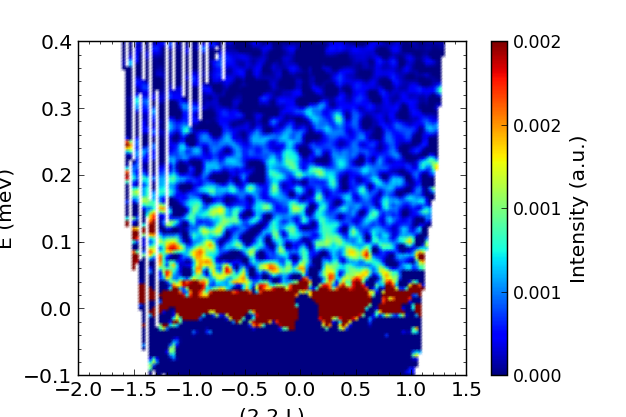

<IPython.core.display.Javascript object>


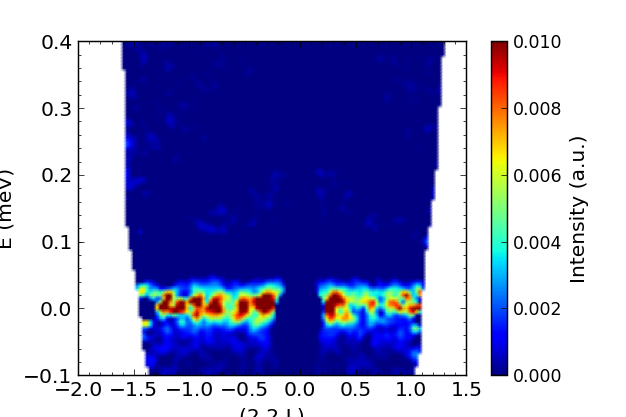

<IPython.core.display.Javascript object>


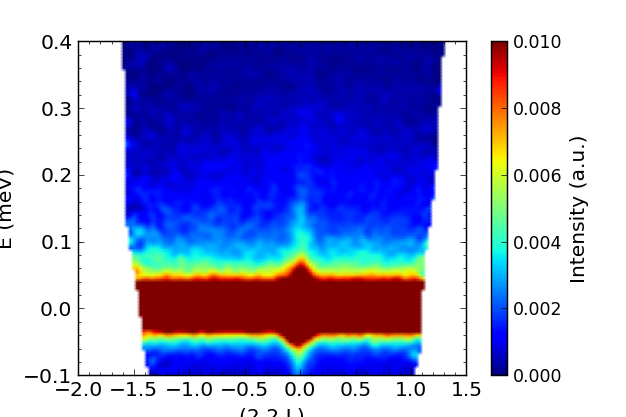

In [11]:
# Ｐｌｏｔ　ｉｎ　ａ　ｌｏｏｐ
# Colorbar limits and steps
#450mK
cb_max = [0.01,  0.002,  0.01,0.01]
cb_st =  [0.002, 0.0005, 0.002, 0.002]
label = '450 mK'

for i in [1,2,3]:
    data = np.genfromtxt(fnames[i]) # data is nE by nQ*nQ
    x, y, z = data[:,0],data[:,1],data[:,2]
    # Get the data shape and reshape for plot
    nx = np.int(np.rint((x.max()-x.min())/np.abs(x[1]-x[0])+1)) # nb of x and y values
    ny = np.int(len(x)/nx)
    X = np.reshape(x,[ny,nx])
    Y = np.reshape(y,[ny,nx])
    Z = z.reshape([ny,nx])
    
    Z = myGfilter(Z, sigma=[1,1], mode='constant')
    
    # Mask Nan
    z_min, z_max = np.nanmin(Z), np.nanmax(Z)
    Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color

    # Plot
    fig = plt.figure(figsize=(6,4))
    # pcolormesh actually draws individual rectangles which contains white lines
    #cmap = plt.cm.RdBu_r
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    pcol = plt.pcolormesh(X,Y, Zm, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
    pcol.set_edgecolor('face') # remove the white lines in the plot

#     plt.text(0.15, 0.9, label, size=15,color='red', ha='center', va='center',transform=plt.gca().transAxes,
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    # set the limits of the plot to the limits of the data
    plt.xlim([-2,1.5])
    plt.ylim([-0.1, 0.4])
    plt.xlabel('(2 2 L)',size=14)
    plt.ylabel(r'E (meV)',size=14)

    plt.minorticks_on()
    plt.xticks(color='k', size=14)
    plt.yticks(color='k', size=14)

    # set colorbar and its properties
    cb = plt.colorbar(aspect=20,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
    cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)

    cb.ax.tick_params(labelsize=12)
    cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
    cb.ax.set_yticklabels(['{:.3f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])], fontsize=12)#, weight='bold')

    fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",verbose=True)  

    plt.show()

## Subtract a smoothed background

D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/20K_E-Q_[22l].txt


C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: invalid value encountered in divide


D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/450mK_E-Q_[22l].txt


<IPython.core.display.Javascript object>


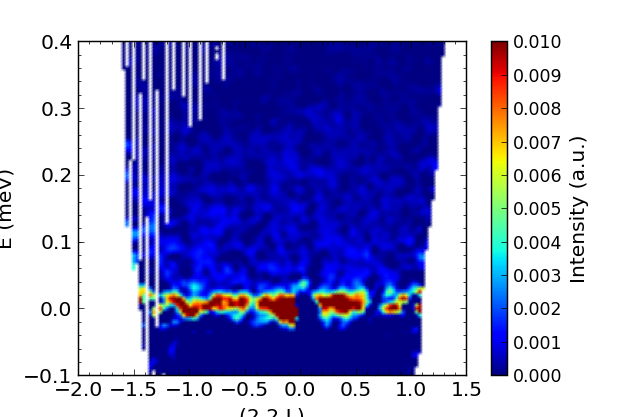

In [50]:
# Subtract a smoothed background

# 20K data
data = np.genfromtxt(fnames[0]) # data is nE by nQ*nQ
print(fnames[0])
x, y, z = data[:,0],data[:,1],data[:,2]
# Get the data shape and reshape for plot
nx = np.int(np.rint((x.max()-x.min())/np.abs(x[1]-x[0])+1)) # nb of x and y values
ny = np.int(len(x)/nx)
X = np.reshape(x,[ny,nx])
Y = np.reshape(y,[ny,nx])
Z = z.reshape([ny,nx])
# Smooth the background
Z = myGfilter(Z, sigma=[0,0], mode='constant')

# 30mK data
data = np.genfromtxt(fnames[3]) # data is nE by nQ*nQ
print(fnames[3])
x, y, z = data[:,0],data[:,1],data[:,2]
# Get the data shape and reshape for plot
nx = np.int(np.rint((x.max()-x.min())/np.abs(x[1]-x[0])+1)) # nb of x and y values
ny = np.int(len(x)/nx)
X = np.reshape(x,[ny,nx])
Y = np.reshape(y,[ny,nx])
# Subtraction
Z = z.reshape([ny,nx])- Z

Z = myGfilter(Z, sigma=[1,1], mode='constant')

# Mask Nan
z_min, z_max = np.nanmin(Z), np.nanmax(Z)
Zm = np.ma.masked_where(np.isnan(Z),Z)# mask Nan values then plot in white color

# Plot
fig = plt.figure(figsize=(6,4))
# pcolormesh actually draws individual rectangles which contains white lines
#cmap = plt.cm.RdBu_r
cmap = plt.cm.jet
cmap.set_bad('w',1.)
pcol = plt.pcolormesh(X,Y, Zm, vmin=0, vmax=cb_max[i], cmap=cmap,linewidth=0,rasterized=True,shading='gouraud')# '_r' is reversed colormap
pcol.set_edgecolor('face') # remove the white lines in the plot

#     plt.text(0.15, 0.9, label, size=15,color='red', ha='center', va='center',transform=plt.gca().transAxes,
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

# set the limits of the plot to the limits of the data
plt.xlim([-2,1.5])
plt.ylim([-0.1, 0.4])
plt.xlabel('(2 2 L)',size=14)
plt.ylabel(r'E (meV)',size=14)

plt.minorticks_on()
plt.xticks(color='k', size=14)
plt.yticks(color='k', size=14)

# set colorbar and its properties
cb = plt.colorbar(aspect=20,pad=0.05,orientation="vertical") # label='Intensity', ticks=range(0,100)
cb.ax.set_ylabel('Intensity (a.u.)',fontsize=14)

# cb.ax.tick_params(labelsize=12)
# cb.set_ticks([x for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])])
# cb.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.arange(0, cb_max[i]+cb_st[i],cb_st[i])], fontsize=12)#, weight='bold')

#fig.savefig(fnames[i].replace("txt", "pdf"), bbox_inches="tight",verbose=True)  

plt.show()